# **Dataset**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing

from sklearn import svm
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: ylabel='Class'>

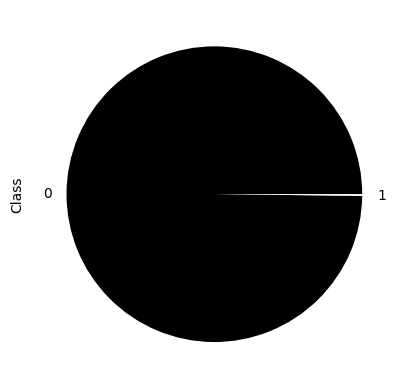

In [ ]:
# showing that this dataset is totally unbalanced
count_classes = pd.value_counts(dataset['Class'])
count_classes.plot.pie(colors = ['black', 'white'])

In [ ]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

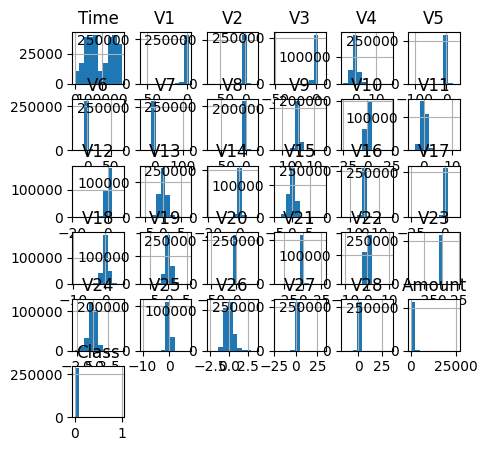

In [ ]:
dataset.hist(figsize=(5, 5));

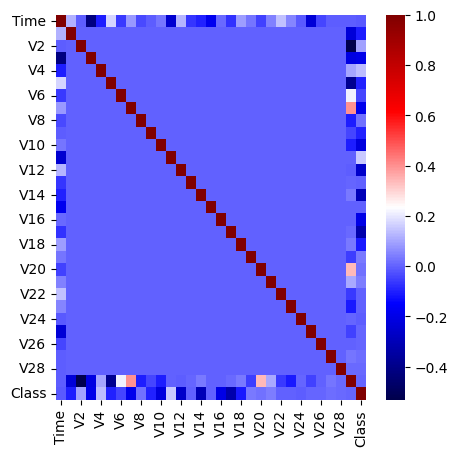

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data=dataset.corr(), cmap="seismic")
plt.show();

In [ ]:
# separating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]
print("Fraud ", fraud.shape)

Fraud  (492, 31)


In [ ]:
# Assume 'Class' column contains the labels (fraud or not fraud)
X = np.asarray(dataset.drop(columns='Class', axis = 1))
y = np.asarray(dataset['Class'])

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "LR": LogisticRegression(),
    "RF": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(),
    "Ada Boost": AdaBoostClassifier(),
    "SGD": SGDClassifier(),
    "MLP": MLPClassifier(),
    "DT": DecisionTreeClassifier(),
    "GNB": GaussianNB(),
    "GB": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Check if the classifier supports probability estimation
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]  # Probability estimates for positive class
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None

    accuracy = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate additional metrics
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    fnr = fn / (fn + tp)  # False Negative Rate
    fpr = fp / (fp + tn)  # False Positive Rate

    print(f"\n{name} Classifier:")
    print(f"Accuracy: {accuracy:.4f}")

    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        print("ROC AUC: Not available for this classifier.")

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"FNR: {fnr:.4f}")
    print(f"FPR: {fpr:.4f}")




LR Classifier:
Accuracy: 0.9991
ROC AUC: 0.9747
Precision: 0.8636
Recall: 0.5816
F1-Score: 0.6951
FNR: 0.4184
FPR: 0.0002

RF Classifier:
Accuracy: 0.9996
ROC AUC: 0.9525
Precision: 0.9868
Recall: 0.7653
F1-Score: 0.8621
FNR: 0.2347
FPR: 0.0000

XGBoost Classifier:
Accuracy: 0.9996
ROC AUC: 0.9811
Precision: 0.9620
Recall: 0.7755
F1-Score: 0.8588
FNR: 0.2245
FPR: 0.0001

SVM Classifier:
Accuracy: 0.9993
ROC AUC: Not available for this classifier.
Precision: 0.9683
Recall: 0.6224
F1-Score: 0.7578
FNR: 0.3776
FPR: 0.0000

Ada Boost Classifier:
Accuracy: 0.9993
ROC AUC: 0.9779
Precision: 0.8554
Recall: 0.7245
F1-Score: 0.7845
FNR: 0.2755
FPR: 0.0002

SGD Classifier:
Accuracy: 0.9989
ROC AUC: Not available for this classifier.
Precision: 0.8333
Recall: 0.4592
F1-Score: 0.5921
FNR: 0.5408
FPR: 0.0002

MLP Classifier:
Accuracy: 0.9995
ROC AUC: 0.9694
Precision: 0.8864
Recall: 0.7959
F1-Score: 0.8387
FNR: 0.2041
FPR: 0.0002

DT Classifier:
Accuracy: 0.9992
ROC AUC: 0.9079
Precision: 0.7477
R

# **Soft Voting**

In [ ]:
classifiers = {
    "VC1": VotingClassifier(estimators=[('RF', RandomForestClassifier()), ('XGB', XGBClassifier()), ('MLP', MLPClassifier())], voting='soft'),
    "VC2": VotingClassifier(estimators=[('RF', RandomForestClassifier()), ('XGB', XGBClassifier()), ('KNN', KNeighborsClassifier())], voting='soft'),
    "VC3": VotingClassifier(estimators=[('XGB', XGBClassifier()), ('MLP', MLPClassifier()), ('KNN', KNeighborsClassifier())], voting='soft')
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Check if the classifier supports probability estimation
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]  # Probability estimates for positive class
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None

    accuracy = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate additional metrics
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    fnr = fn / (fn + tp)
    fpr = fp / (fp + tn)

    print(f"\n{name} Classifier:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"Recall: {recall:.4f}")

    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        print("ROC AUC: Not available for this classifier.")

    print(f"FNR: {fnr:.4f}")
    print(f"FPR: {fpr:.4f}")



VC1 Classifier:
Accuracy: 0.9996
Precision: 0.9747
F1-Score: 0.8701
Recall: 0.7857
ROC AUC: 0.9807
FNR: 0.2143
FPR: 0.0000

VC2 Classifier:
Accuracy: 0.9996
Precision: 0.9750
F1-Score: 0.8764
Recall: 0.7959
ROC AUC: 0.9817
FNR: 0.2041
FPR: 0.0000

VC3 Classifier:
Accuracy: 0.9996
Precision: 0.9625
F1-Score: 0.8652
Recall: 0.7857
ROC AUC: 0.9820
FNR: 0.2143
FPR: 0.0001


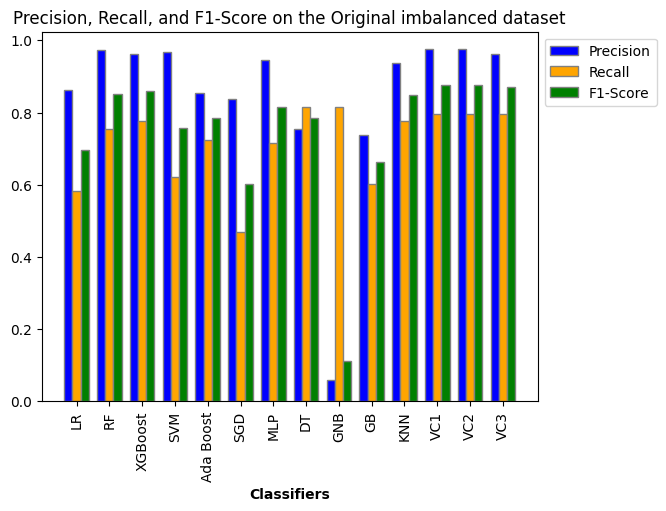

In [ ]:
classifiers = {
    "LR": LogisticRegression(),
    "RF": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(),
    "Ada Boost": AdaBoostClassifier(),
    "SGD": SGDClassifier(),
    "MLP": MLPClassifier(),
    "DT": DecisionTreeClassifier(),
    "GNB": GaussianNB(),
    "GB": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "VC1": VotingClassifier(estimators=[('RF', RandomForestClassifier()), ('XGB', XGBClassifier()), ('MLP', MLPClassifier())], voting='soft'),
    "VC2": VotingClassifier(estimators=[('RF', RandomForestClassifier()), ('XGB', XGBClassifier()), ('KNN', KNeighborsClassifier())], voting='soft'),
    "VC3": VotingClassifier(estimators=[('XGB', XGBClassifier()), ('MLP', MLPClassifier()), ('KNN', KNeighborsClassifier())], voting='soft')
}

# Dictionary to store metrics for each classifier
metrics = {'Classifier': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate metrics
    precision_score_value = precision_score(y_test, y_pred)
    recall_score_value = recall_score(y_test, y_pred)
    f1_score_value = f1_score(y_test, y_pred)

    # Store metrics in the dictionary
    metrics['Classifier'].append(name)
    metrics['Precision'].append(precision_score_value)
    metrics['Recall'].append(recall_score_value)
    metrics['F1-Score'].append(f1_score_value)

# Create a bar chart
barWidth = 0.25
r1 = np.arange(len(metrics['Classifier']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, metrics['Precision'], color='blue', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, metrics['Recall'], color='orange', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, metrics['F1-Score'], color='green', width=barWidth, edgecolor='grey', label='F1-Score')

plt.xlabel('Classifiers', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(metrics['Classifier']))], metrics['Classifier'], rotation=90)
plt.title('Precision, Recall, and F1-Score on the Original imbalanced dataset')
plt.legend(["Precision","Recall", "F1-Score"], bbox_to_anchor=(1,1), loc="upper left")

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


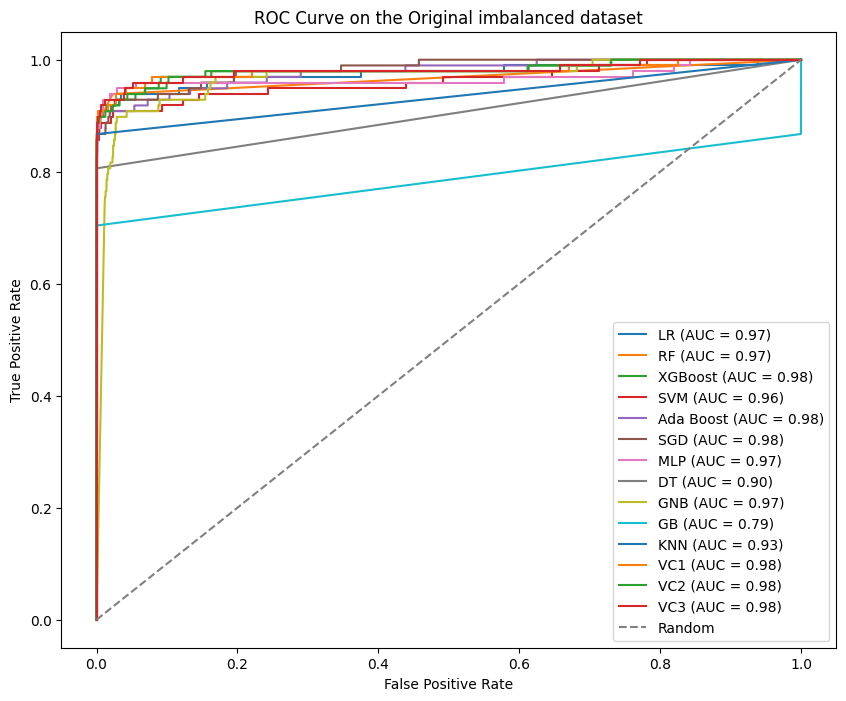

In [ ]:
classifiers = {
    "LR": LogisticRegression(),
    "RF": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(probability=True),
    "Ada Boost": AdaBoostClassifier(),
    "SGD": SGDClassifier(loss='log'),
    "MLP": MLPClassifier(),
    "DT": DecisionTreeClassifier(),
    "GNB": GaussianNB(),
    "GB": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "VC1": VotingClassifier(estimators=[('RF', RandomForestClassifier()), ('XGB', XGBClassifier()), ('MLP', MLPClassifier())], voting='soft'),
    "VC2": VotingClassifier(estimators=[('RF', RandomForestClassifier()), ('XGB', XGBClassifier()), ('KNN', KNeighborsClassifier())], voting='soft'),
    "VC3": VotingClassifier(estimators=[('XGB', XGBClassifier()), ('MLP', MLPClassifier()), ('KNN', KNeighborsClassifier())], voting='soft')
}
# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]
    elif hasattr(clf, "decision_function"):
        y_prob = clf.decision_function(X_test)
    else:
        raise ValueError(f"Classifier {name} does not support probability estimates or decision function.")

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on the Original imbalanced dataset')
plt.legend()
plt.show()

# **Friedman Test**

In [ ]:
from scipy.stats import friedmanchisquare
import numpy as np

# Define your data
xgboost_metrics = [0.9996, 0.9811, 0.9620, 0.7755, 0.8588, 0.2245, 0.0001]
vc1_metrics = [0.9996, 0.9807, 0.9747, 0.7857, 0.8701, 0.2143, 0.0000]
vc2_metrics = [0.9996, 0.9817, 0.9750, 0.7959, 0.8764, 0.2041, 0.0000]
vc3_metrics = [0.9996, 0.9820, 0.9625, 0.7857, 0.8652, 0.2143, 0.0001]

# Create a matrix of metrics for all classifiers
all_metrics = np.array([xgboost_metrics, vc1_metrics, vc2_metrics, vc3_metrics])

# Perform Friedman Test
statistic, p_value = friedmanchisquare(*all_metrics.T)

# Summarize and interpret the result
print(f"Friedman Test:")
print(f"Chi-squared Statistic: {statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value <= 0.05:
    print('The difference is statistically significant across at least one metric.')
else:
    print('No statistically significant difference across metrics.')

Friedman Test:
Chi-squared Statistic: 24.0000
P-Value: 0.0005
The difference is statistically significant across at least one metric.
